In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [38]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = r'C://Users//Facu//Downloads//EE_Kisangani_reduced'
combined_df = combine_csv_files(folder_path_2019)

In [11]:
combined_df = pd.read_csv(r"C:\Users\Facu\Downloads\Datos_RF_2022_2.csv")

In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25436 entries, 0 to 25435
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       25436 non-null  int64  
 1   CVI                25436 non-null  float64
 2   EVI                25436 non-null  float64
 3   HH_dB              25436 non-null  float64
 4   HH_dB_Contrast     25436 non-null  float64
 5   HH_dB_Correlation  25436 non-null  float64
 6   HH_dB_Entropy      25436 non-null  float64
 7   HH_dB_Inertia      25436 non-null  float64
 8   HH_div_HV          25436 non-null  float64
 9   HH_minus_HV        25436 non-null  float64
 10  HH_plus_HV         25436 non-null  float64
 11  HV_dB              25436 non-null  float64
 12  HV_dB_Contrast     25436 non-null  float64
 13  HV_dB_Correlation  25436 non-null  float64
 14  HV_dB_Entropy      25436 non-null  float64
 15  HV_dB_Inertia      25436 non-null  float64
 16  MNDWI              254

In [5]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.describe()

,system:index,CVI,EVI,HH_dB,HH_dB_Contrast,HH_dB_Correlation,HH_dB_Entropy,HH_dB_Inertia,HH_div_HV,HH_minus_HV,...,SR_B5,SR_B6,agbd,agbd_1,agbd_se,aspect,elevation,label,slope,threshold
count,4422.000000,4422.000000,4422.000000,4.422000e+03,4.422000e+03,4422.000000,4422.000000,4.422000e+03,4422.000000,4.422000e+03,...,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000
mean,2210.500000,16801.544182,2.066955,-4.163231e+13,1.175859e+15,0.326735,4.420089,1.175859e+15,0.584453,2.225179e+13,...,16723.384781,14494.750565,71.046078,71.046078,12.455608,169.377570,415.641113,2.276119,14.325847,60.869941
std,1276.665775,2219.713614,4.706625,2.768470e+15,1.180452e+16,0.167760,0.513660,1.180452e+16,0.102481,1.479702e+15,...,2221.229937,2964.409019,96.708707,96.708707,6.541622,99.941537,415.414678,1.827425,10.417435,62.298049
min,0.000000,7630.583500,-25.771084,-1.840981e+17,1.097955e+00,-0.137803,2.206913,1.097955e+00,-0.894962,-2.127535e+02,...,8007.000000,7907.500000,0.834731,0.834731,2.981795,-0.000000,-2.000000,0.000000,0.000000,0.535848
25%,1105.250000,15299.953750,1.197918,-1.677880e+01,1.071386e+01,0.210147,4.183882,1.071386e+01,0.536774,6.973946e+00,...,15200.625000,12089.625000,11.271349,11.271349,4.167980,87.622693,63.000000,1.000000,4.255210,12.632623
50%,2210.500000,16872.130000,1.887395,-1.271104e+01,2.306261e+01,0.326062,4.532621,2.306261e+01,0.598564,9.007083e+00,...,16782.000000,14280.250000,22.639543,22.639543,17.122165,159.817260,284.000000,1.000000,13.791158,33.251474
75%,3315.750000,18245.599000,2.821995,-9.580622e+00,6.128790e+01,0.442744,4.801412,6.128790e+01,0.648692,1.148013e+01,...,18228.000000,16398.625000,106.440810,106.440810,17.131213,256.501150,665.750000,5.000000,22.506863,98.305498
max,4421.000000,26993.684000,252.777778,6.925370e+02,3.029097e+17,0.894837,5.220150,3.029097e+17,0.870691,9.839741e+16,...,23926.000000,27240.000000,1245.977500,1245.977500,17.300920,359.135000,1898.000000,8.000000,52.862350,360.431924


In [6]:
# df_filtered = combined_df[combined_df['threshold'] <100]
# df_filtered.info()

In [13]:
def remove_outliers(df, column_name):

    mean = df[column_name].mean()
    std_dev = df[column_name].std()    
    threshold = 2 * std_dev    
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))    
    df_filtered = df[condition]
    
    return df_filtered

df_filtered_remove = remove_outliers(combined_df, "agbd")
df_filtered_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24307 entries, 0 to 25435
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       24307 non-null  int64  
 1   CVI                24307 non-null  float64
 2   EVI                24307 non-null  float64
 3   HH_dB              24307 non-null  float64
 4   HH_dB_Contrast     24307 non-null  float64
 5   HH_dB_Correlation  24307 non-null  float64
 6   HH_dB_Entropy      24307 non-null  float64
 7   HH_dB_Inertia      24307 non-null  float64
 8   HH_div_HV          24307 non-null  float64
 9   HH_minus_HV        24307 non-null  float64
 10  HH_plus_HV         24307 non-null  float64
 11  HV_dB              24307 non-null  float64
 12  HV_dB_Contrast     24307 non-null  float64
 13  HV_dB_Correlation  24307 non-null  float64
 14  HV_dB_Entropy      24307 non-null  float64
 15  HV_dB_Inertia      24307 non-null  float64
 16  MNDWI              24307 no

In [14]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24307 entries, 0 to 25435
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       24307 non-null  int64  
 1   CVI                24307 non-null  float64
 2   EVI                24307 non-null  float64
 3   HH_dB              24307 non-null  float64
 4   HH_dB_Contrast     24307 non-null  float64
 5   HH_dB_Correlation  24307 non-null  float64
 6   HH_dB_Entropy      24307 non-null  float64
 7   HH_dB_Inertia      24307 non-null  float64
 8   HH_div_HV          24307 non-null  float64
 9   HH_minus_HV        24307 non-null  float64
 10  HH_plus_HV         24307 non-null  float64
 11  HV_dB              24307 non-null  float64
 12  HV_dB_Contrast     24307 non-null  float64
 13  HV_dB_Correlation  24307 non-null  float64
 14  HV_dB_Entropy      24307 non-null  float64
 15  HV_dB_Inertia      24307 non-null  float64
 16  MNDWI              24307 no

In [15]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo','system:index', 'agbd_se','agbd_1']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24307 entries, 0 to 25435
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CVI                24307 non-null  float64
 1   EVI                24307 non-null  float64
 2   HH_dB              24307 non-null  float64
 3   HH_dB_Contrast     24307 non-null  float64
 4   HH_dB_Correlation  24307 non-null  float64
 5   HH_dB_Entropy      24307 non-null  float64
 6   HH_dB_Inertia      24307 non-null  float64
 7   HH_div_HV          24307 non-null  float64
 8   HH_minus_HV        24307 non-null  float64
 9   HH_plus_HV         24307 non-null  float64
 10  HV_dB              24307 non-null  float64
 11  HV_dB_Contrast     24307 non-null  float64
 12  HV_dB_Correlation  24307 non-null  float64
 13  HV_dB_Entropy      24307 non-null  float64
 14  HV_dB_Inertia      24307 non-null  float64
 15  MNDWI              24307 non-null  float64
 16  NBR                24307 no

In [22]:
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]
print(features)

['CVI', 'EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NBR', 'NDBI', 'NDVI', 'NDWI', 'RVI', 'RVI_palsar', 'SAVI', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'agbd', 'aspect', 'elevation', 'label', 'slope']


In [28]:
feature_names =  ['CVI', 'EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NBR', 'NDBI', 'NDVI', 'NDWI', 'RVI', 'RVI_palsar', 'SAVI', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'agbd', 'aspect', 'elevation', 'label', 'slope']

reduced = [
    "SR_B4",
    "slope",
    "elevation",
    "NDBI",
    "EVI",
    "SR_B3",
    "NDWI",
    "aspect",
    "SR_B2",
    "HV_dB_Entropy",
    "HV_dB_Correlation",
    "NBR",
    "HH_dB_Correlation",
    "HH_minus_HV",
    "HV_dB",
    "HH_dB_Entropy",
    "HH_dB",
    "MNDWI",
    "RVI_palsar",
    "HH_plus_HV",
    'agbd'
]


radar = ['CH', 'B8','elevation', 'slope', 'NDBI', 'VV_minus_VH' , 'EVI',  'VH_Entropy', 'B11', 'aspect','VV_Correlation', 'VV', 'agbd']


# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# feature_names_reduced =  ['agbd','NDBI','MNDWI','HV_dB','SR_B4','SR_B3','elevation','slope','EVI','HV_dB_Entropy','HV_dB_Correlation','SR_B2','HH_dB_Correlation','SR_B1','aspect']

df_reduce = df_modified[reduced]

In [29]:
y = df_reduce['agbd']
X = df_reduce.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24307 entries, 0 to 25435
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SR_B4              24307 non-null  float64
 1   slope              24307 non-null  float64
 2   elevation          24307 non-null  int64  
 3   NDBI               24307 non-null  float64
 4   EVI                24307 non-null  float64
 5   SR_B3              24307 non-null  float64
 6   NDWI               24307 non-null  float64
 7   aspect             24307 non-null  float64
 8   SR_B2              24307 non-null  float64
 9   HV_dB_Entropy      24307 non-null  float64
 10  HV_dB_Correlation  24307 non-null  float64
 11  NBR                24307 non-null  float64
 12  HH_dB_Correlation  24307 non-null  float64
 13  HH_minus_HV        24307 non-null  float64
 14  HV_dB              24307 non-null  float64
 15  HH_dB_Entropy      24307 non-null  float64
 16  HH_dB              24307 no

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# import numpy as np
# rf = RandomForestRegressor(random_state=42)

# # Definir el grid de parámetros para buscar
# param_grid = {
#     'n_estimators': [100,200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2],    
# }

# # Configurar GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print(f'Best parameters: {best_params}')

# # Entrenar el modelo con los mejores parámetros
# best_rf = grid_search.best_estimator_
# best_rf.fit(X_train, y_train)

# y_pred = best_rf.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f'Root Mean Squared Error: {rmse}')
# print(f'R^2 Score: {r2}')

In [32]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 15.719493630976661
R^2 Score: 0.5763903039038868


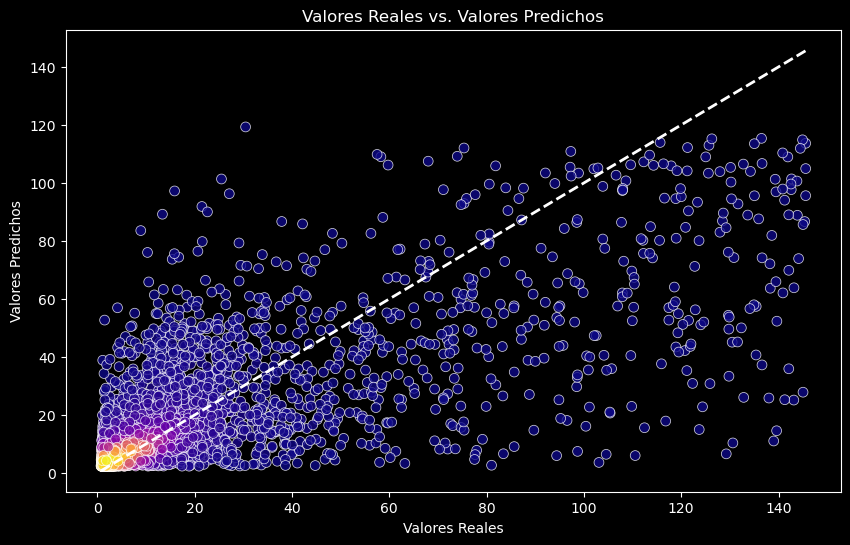

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

              Feature  Importance
0               SR_B4    0.285845
1               slope    0.199408
4                 EVI    0.174257
2           elevation    0.063778
11                NBR    0.037372
15      HH_dB_Entropy    0.024640
3                NDBI    0.024562
9       HV_dB_Entropy    0.020127
7              aspect    0.018386
18         RVI_palsar    0.016044
12  HH_dB_Correlation    0.015017
6                NDWI    0.014902
13        HH_minus_HV    0.014810
17              MNDWI    0.014469
5               SR_B3    0.014163
8               SR_B2    0.013956
10  HV_dB_Correlation    0.013030
16              HH_dB    0.012623
14              HV_dB    0.012242
19         HH_plus_HV    0.010368


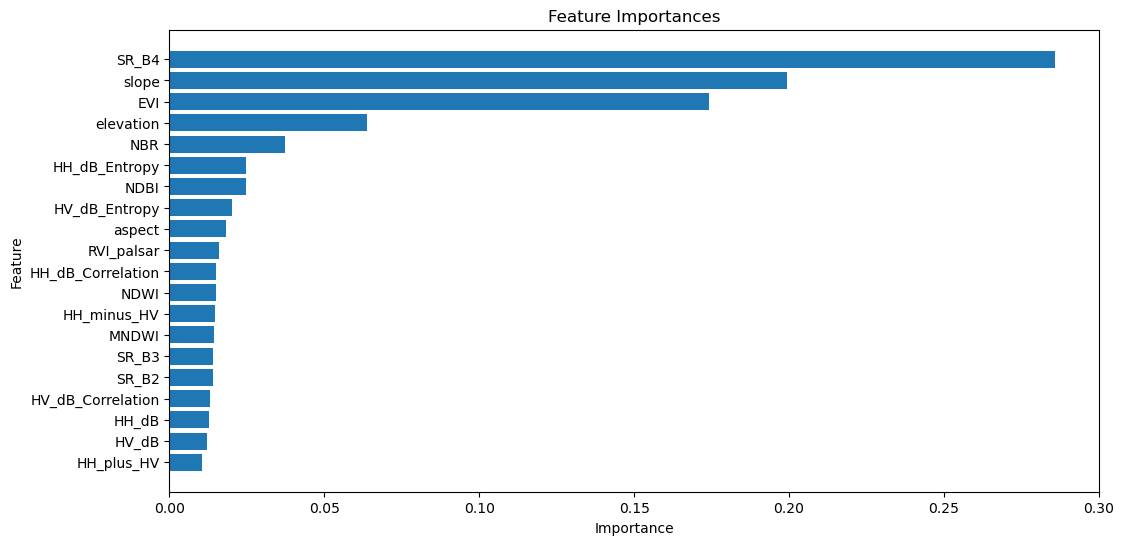

In [33]:
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [34]:
band_list = [
    "SR_B4",
    "slope",
    "elevation",
    "NDBI",
    "EVI",
    "SR_B3",
    "NDWI",
    "aspect",
    "SR_B2",
    "HV_dB_Entropy",
    "HV_dB_Correlation",
    "NBR",
    "HH_dB_Correlation",
    "HH_minus_HV",
    "HV_dB",
    "HH_dB_Entropy",
    "HH_dB",
    "MNDWI",
    "RVI_palsar",
    "HH_plus_HV",
   
]


trees = ml.rf_to_strings(rf, band_list, output_mode='regression')

In [22]:
# create a ee classifier to use with ee objects from the trees
# ee_classifier = ml.strings_to_classifier(trees)

In [35]:
# this function also works with the ensemble.ExtraTrees estimator
# trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/mdg_south_prueb"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [65]:
# def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=11):
#     trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
#     total_trees = len(trees)
    
#     # Dividir los árboles en partes
#     for i in range(0, total_trees, part_size):
#         part_trees = trees[i:i+part_size]
#         part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
#         # Exportar la parte
#         ml.export_trees_to_fc(part_trees, part_asset_id)
#         print(f"Parte {i//part_size} exportada a {part_asset_id}")

# # Ejemplo de uso:
# user_id = 'users/facuboladerasgee'
# base_asset_id = f"{user_id}/Rf_Malambique"
# export_model_in_parts(rf, feature_names_reduced, user_id, base_asset_id)

In [27]:
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Función para entrenar modelos utilizando bootstrap
def bootstrap_models(X_train, y_train, X_test, y_test, n_models=10, random_state=42):

    models = []
    r2_scores = []

    for i in range(n_models):
        # Crear una muestra bootstrap del conjunto de entrenamiento
        X_train_bootstrap, y_train_bootstrap = resample(
            X_train, y_train, replace=True, n_samples=len(y_train), random_state=random_state + i
        )
        
        # Entrenar el modelo en la muestra bootstrap
        model = RandomForestRegressor(
            bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2,
            n_estimators=100, random_state=random_state + i
        )
        model.fit(X_train_bootstrap, y_train_bootstrap)
        
        # Evaluar el modelo en el conjunto de prueba
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        models.append(model)
        
        print(f"Modelo {i+1} entrenado con muestra bootstrap. R²: {r2:.4f}")
    
    return models, r2_scores

# Función para convertir y subir los modelos a GEE
def upload_models_to_gee(models, feature_names_reduced, user_id, base_asset_name="Rf_Bootstrap_mdg_south_comb"):
    """
    Convierte cada modelo en la lista 'models' a formato de string compatible con GEE y sube cada uno como un asset.
    
    Args:
        models: Lista de modelos entrenados.
        feature_names_reduced: Lista de nombres de las características usadas en el modelo.
        user_id: ID del usuario de GEE (ej. 'users/tu_usuario').
        base_asset_name: Prefijo del nombre de los assets a subir en GEE.
    """
    for i, model in enumerate(models):
        # Convertir el modelo a cadenas
        trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
        
        # Especificar el ID del asset para este modelo
        asset_id = f"{user_id}/{base_asset_name}_model_{i+1}"
        
        # Iniciar el proceso de exportación para cada modelo
        ml.export_trees_to_fc(trees, asset_id)
        print(f"Modelo {i+1} subido a GEE con asset_id: {asset_id}")

# Lista de características reducidas (modifica si es necesario)
feature_names_reduced = [
    "SR_B4",
    "slope",
    "EVI",
    "elevation",
    "NBR",
    "NDBI",
    "aspect",
    "HV_dB_Inertia",
    "HH_minus_HV",
    "HH_dB_Entropy",
    "HV_dB_Entropy",
    "HH_dB_Correlation",
    "SR_B3",
    "HV_dB_Contrast",
  
]
# Entrenar los modelos utilizando la función bootstrap_models
models, r2_scores = bootstrap_models(X_train, y_train, X_test, y_test, n_models=10)

# ID de usuario en GEE
user_id = 'users/facuboladerasgee'  # Cambia a tu usuario de GEE
# Llamar a la función para subir los modelos
upload_models_to_gee(models, feature_names_reduced, user_id)

Modelo 1 entrenado con muestra bootstrap. R²: 0.5669
Modelo 2 entrenado con muestra bootstrap. R²: 0.5626
Modelo 3 entrenado con muestra bootstrap. R²: 0.5625
Modelo 4 entrenado con muestra bootstrap. R²: 0.5635
Modelo 5 entrenado con muestra bootstrap. R²: 0.5654
Modelo 6 entrenado con muestra bootstrap. R²: 0.5592
Modelo 7 entrenado con muestra bootstrap. R²: 0.5626
Modelo 8 entrenado con muestra bootstrap. R²: 0.5642
Modelo 9 entrenado con muestra bootstrap. R²: 0.5669
Modelo 10 entrenado con muestra bootstrap. R²: 0.5632
Modelo 1 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_mdg_south_comb_model_1
Modelo 2 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_mdg_south_comb_model_2
Modelo 3 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_mdg_south_comb_model_3
Modelo 4 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_mdg_south_comb_model_4
Modelo 5 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_mdg_south_comb_mo